# Introduction to Deep Learning & TensorFlow

##  What is Deep Learning?
Deep Learning is a subfield of Machine Learning that uses Artificial Neural Networks (ANNs) to learn patterns from data. It is inspired by the human brain, where neurons process and transmit information.

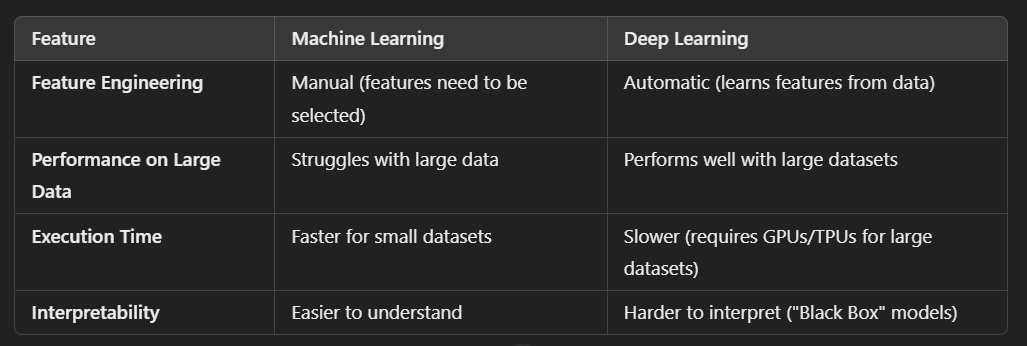

**📌 Why Deep Learning?**
    
Deep Learning is useful when:
- ✅ Data is large and complex (e.g., images, text, speech)
- ✅ Feature extraction is difficult (Deep Learning learns features automatically)
- ✅ Traditional machine learning models fail to give good accuracy

**Real-world applications of Deep Learning:**
- ✔️ Image Recognition (Face ID, Self-Driving Cars)
- ✔️ Natural Language Processing (Chatbots, Translation, GPT)
- ✔️ Healthcare (Disease Detection, Drug Discovery)
- ✔️ Finance (Fraud Detection, Stock Prediction)

## Introduction to Neural Networks
A Neural Network is a system of layers of neurons (nodes) that process and learn from data. It has three main layers:

- 1️⃣ Input Layer - Takes raw data as input
- 2️⃣ Hidden Layers - Performs computations and feature extraction
- 3️⃣ Output Layer - Produces the final prediction

**🔹 How does a Neural Network learn?**
- 1️⃣ Input data goes through layers.
- 2️⃣ Each neuron applies a weight and a bias to the input.
- 3️⃣ The neuron applies an activation function (e.g., ReLU, Sigmoid).
- 4️⃣ The final output is compared to the correct answer using a loss function.
- 5️⃣ The model updates weights using backpropagation & optimization (Gradient Descent).

**📌 Example: Recognizing handwritten digits using a neural network**
- 👉 Input: Image of a handwritten digit
- 👉 Hidden layers extract features like edges, curves, etc.
- 👉 Output: A predicted number (0-9)



## What is TensorFlow?
TensorFlow is an open-source deep learning framework developed by Google. It allows you to build and train neural networks efficiently.

**📌 Why use TensorFlow?**
- ✔️ Scalability - Works with small and large datasets
- ✔️ GPU/TPU Support - Speeds up training using hardware acceleration
- ✔️ Pre-trained Models - Use powerful pre-trained models (MobileNet, ResNet, etc.)
- ✔️ Easy Deployment - Can be deployed on mobile, web, cloud, or edge devices

💡 TensorFlow uses Tensors to store and process data. A Tensor is just a fancy name for a multi-dimensional array (like NumPy arrays but optimized for deep learning).

## Installing TensorFlow & Setting Up the Environment

In [ ]:
pip install tensorflow

In [3]:
import tensorflow as tf
print(tf.__version__)  # Should print TensorFlow version

2.18.0


In [ ]:
# If you have a GPU, install the GPU version for faster training:
pip install tensorflow-gpu

In [ ]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

## Understanding Tensors: The Core of TensorFlow

- A Tensor is a multi-dimensional array. It stores data and performs operations in TensorFlow.

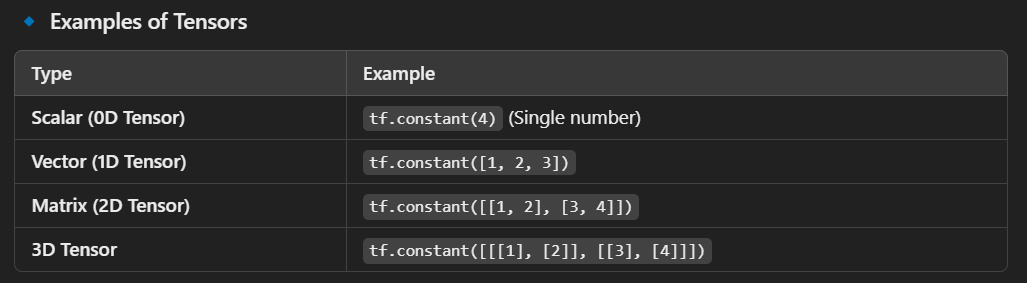

In [4]:
# Scalar (0D Tensor)
scalar = tf.constant(5)
print(scalar)

tf.Tensor(5, shape=(), dtype=int32)


In [5]:
# Vector (1D Tensor)
vector = tf.constant([1, 2, 3])
print(vector)

tf.Tensor([1 2 3], shape=(3,), dtype=int32)


In [6]:
# Matrix (2D Tensor)
matrix = tf.constant([[1, 2], [3, 4]])
print(matrix)

tf.Tensor(
[[1 2]
 [3 4]], shape=(2, 2), dtype=int32)


In [7]:
# 3D Tensor
tensor_3d = tf.constant([[[1, 2, 3], [4, 5, 6]], [[7, 8, 9], [10, 11, 12]]])
print(tensor_3d)

tf.Tensor(
[[[ 1  2  3]
  [ 4  5  6]]

 [[ 7  8  9]
  [10 11 12]]], shape=(2, 2, 3), dtype=int32)


In [8]:
print(matrix.shape)  # Output: (2, 2)

(2, 2)


## TensorFlow Basics: Variables, Constants, and Placeholders

In [9]:
# A constant is a fixed value that doesn’t change during execution.

c = tf.constant(10)
print(c)  # Output: 10

tf.Tensor(10, shape=(), dtype=int32)


In [10]:
# A variable stores a value that can be updated (used for weights in neural networks).

v = tf.Variable(5)
print(v)

<tf.Variable 'Variable:0' shape=() dtype=int32, numpy=5>


In [11]:
v.assign(10)  # Changes value of v to 10

<tf.Variable 'UnreadVariable' shape=() dtype=int32, numpy=10>

**📌 Placeholder (Deprecated)**

TensorFlow 2.x does not use placeholders (used in TF 1.x). Instead, we use function arguments to pass dynamic values.

# Building Blocks of Deep Learning Models

## Activation Functions

In a neural network, each neuron takes an input, processes it, and produces an output. An activation function decides how much signal should pass to the next layer. Without activation functions, neural networks would just be linear models, which cannot learn complex patterns.

### ReLU (Rectified Linear Unit)

-  It helps in avoiding the vanishing gradient problem and speeds up training.
- Used in: Hidden layers of deep networks.

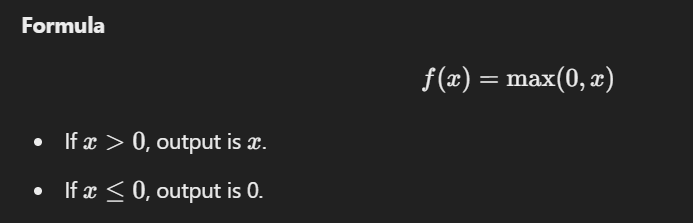

**Why Use ReLU?**
- ✅ Efficient → Simple to compute and works well in deep networks.
- ✅ Avoids Vanishing Gradient → Unlike sigmoid/tanh, it does not cause very small gradients that slow down learning.
- ❌ Problem: Dying ReLU → If many neurons output 0, they stop learning (this happens when weights get too negative).

**Where to Use?**
- Best for Hidden Layers in deep neural networks.
- Image Processing & Computer Vision Tasks (CNNs).
- General-purpose deep learning models.

In [12]:
# Applying ReLU activation
x = tf.constant([-2.0, -1.0, 0.0, 1.0, 2.0])
relu_output = tf.nn.relu(x)

print(relu_output.numpy())  # Output: [0. 0. 0. 1. 2.]

[0. 0. 0. 1. 2.]


### Sigmoid (Logistic Function)

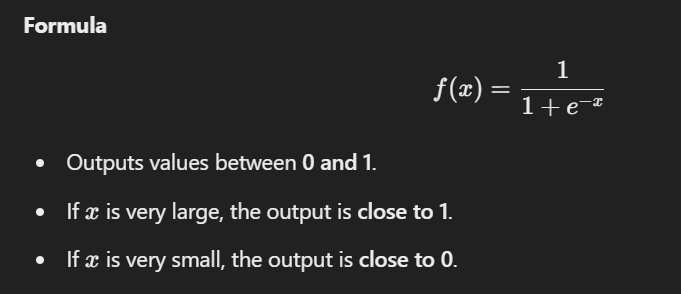

**Why Use Sigmoid?**
- ✅ Probability Interpretation → Good for binary classification since it outputs values between 0 and 1.
- ✅ Smooth and Differentiable → Helps in optimization.
- ❌ Problem: Vanishing Gradient → For very large or small values of 
𝑥
x, gradients become very small, making learning slow.

**Where to Use?**
- Output layer in Binary Classification Problems.
- Not recommended for hidden layers (due to vanishing gradient).

In [13]:
sigmoid_output = tf.nn.sigmoid(x)

print(sigmoid_output.numpy())  # Output: [0.1192  0.2689  0.5  0.7310  0.8808]

[0.11920292 0.26894143 0.5        0.7310586  0.8807971 ]


### Softmax

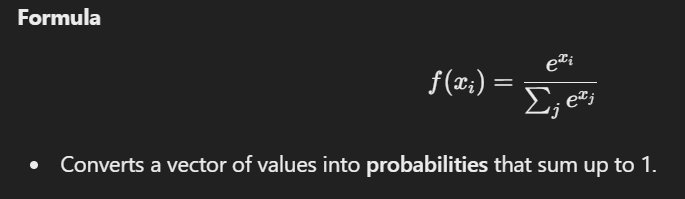

**Why Use Softmax?**
- ✅ Used for Multi-Class Classification → It assigns probabilities to multiple classes.
- ✅ Ensures Sum of Probabilities = 1 → Useful when choosing one category from many.
- ❌ Sensitive to Large Values → If inputs are very large, softmax may cause numerical instability.

**Where to Use?**
- Output layer in Multi-Class Classification Problems (e.g., classifying digits 0-9).

In [14]:
logits = tf.constant([2.0, 1.0, 0.1])
softmax_output = tf.nn.softmax(logits)

print(softmax_output.numpy())  # Output: [0.659 0.242 0.099] 
# Since 2.0 is the largest, the probability is highest for the first class.

[0.6590011  0.24243298 0.09856588]


###  Tanh (Hyperbolic Tangent) Activation Function

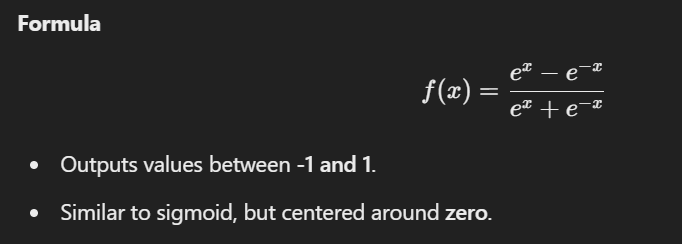

**Why Use Tanh?**
- ✅ Zero-Centered Output → Unlike sigmoid, which outputs between 0 and 1, tanh outputs between -1 and 1, making training more balanced.
- ✅ Better than Sigmoid → Avoids bias shift, leading to faster learning.
- ❌ Problem: Vanishing Gradient → Similar to sigmoid, it can suffer from vanishing gradients for large or small values.

**Where to Use?**
- Hidden layers of Neural Networks when data is centered around 0.
- Recurrent Neural Networks (RNNs) for sequential data.

In [15]:
tanh_output = tf.nn.tanh(x)

print(tanh_output.numpy())  # Output: [-0.964 -0.761  0.    0.761  0.964]

[-0.9640276 -0.7615942  0.         0.7615942  0.9640276]


### Summary

- Use ReLU in hidden layers for deep learning models.
- Use Sigmoid in binary classification output layers.
- Use Softmax in multi-class classification output layers.
- Use Tanh in hidden layers, especially in RNNs.

In [17]:
# Define inputs
x = tf.constant([-2.0, -1.0, 0.0, 1.0, 2.0])

# Apply activation functions
relu_output = tf.nn.relu(x)  # ReLU
sigmoid_output = tf.nn.sigmoid(x)  # Sigmoid
tanh_output = tf.nn.tanh(x)  # Tanh
softmax_output = tf.nn.softmax(x)  # Softmax

# Print results
print("ReLU:", relu_output.numpy())
print("Sigmoid:", sigmoid_output.numpy())
print("Tanh:", tanh_output.numpy())
print("Softmax:", softmax_output.numpy())  # Softmax is for multi-class probabilities

ReLU: [0. 0. 0. 1. 2.]
Sigmoid: [0.11920292 0.26894143 0.5        0.7310586  0.8807971 ]
Tanh: [-0.9640276 -0.7615942  0.         0.7615942  0.9640276]
Softmax: [0.01165623 0.03168492 0.08612853 0.23412165 0.63640857]


In [ ]:
output = tf.keras.layers.Dense(1, activation='sigmoid')  # Used in binary classification
output = tf.keras.layers.Dense(10, activation='tanh')  # Used in hidden layers
output = tf.keras.layers.Dense(64, activation='relu')  # Used in hidden layers
output = tf.keras.layers.Dense(3, activation='softmax')  # Used in multi-class classification

output = tf.keras.layers.LeakyReLU(alpha=0.01) # Provides better learning than normal ReLU.
# Used in GANs (Generative Adversarial Networks) and reinforcement learning.

output = tf.keras.layers.Dense(64, activation='swish') 
# Works well for deep networks (e.g., EfficientNet, transformers).

- ReLU is the most commonly used in hidden layers due to its efficiency.
- Sigmoid & Softmax are used in the output layer for classification problems.
- Leaky ReLU and Swish are improvements over ReLU for deep networks.

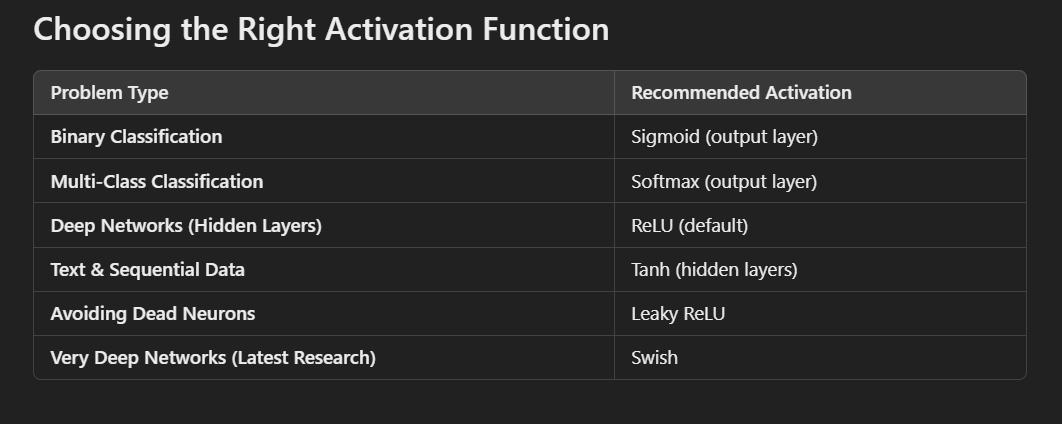

## Loss Functions

A loss function measures how well the neural network is performing. It calculates the difference between predicted output and actual output. The `goal is to minimize the loss`.

1. Mean Squared Error (MSE) – For regression problems
2. Mean Absolute Error (MAE) – For regression problems(Less sensitive to outliers than MSE)
3. Huber Loss - Handles outliers better (MSE punishes them too much, MAE ignores them). Uses MSE for small errors and MAE for large errors. 
    - Where to use: When outliers exist, but you don’t want to completely ignore them (e.g., predicting house prices).
    - When you need a balance between MSE and MAE.
    - Requires tuning of parameter δ (threshold between MSE and MAE behavior).
4. Binary Cross-Entropy – For binary classification
5. Categorical Cross-Entropy – For multi-class classification
6. Sparse Categorical Cross-Entropy - Similar to Categorical Cross-Entropy, but used when labels are not one-hot encoded (i.e., labels are integers).

In [20]:
# Define true values and predictions
y_true = tf.constant([1.0, 0.0, 1.0, 0.0])
y_pred = tf.constant([0.9, 0.1, 0.8, 0.2])

# Calculate loss
mse = tf.keras.losses.MeanSquaredError()(y_true, y_pred)
mae = tf.keras.losses.MeanAbsoluteError()(y_true, y_pred)
huber = tf.keras.losses.Huber(delta=1.0)(y_true, y_pred)

binary_crossentropy = tf.keras.losses.BinaryCrossentropy()(y_true, y_pred)
categorical_crossentropy = tf.keras.losses.CategoricalCrossentropy()(y_true, y_pred)

print("MSE Loss:", mse.numpy())
print("MAE Loss:", mae.numpy())
print("Huber Loss:", huber.numpy())

print("Binary Cross-Entropy Loss:", binary_crossentropy.numpy())
print("Categorical Cross-Entropy Loss:", categorical_crossentropy.numpy())

MSE Loss: 0.025000002
MAE Loss: 0.15
Huber Loss: 0.012500001
Binary Cross-Entropy Loss: 0.16425204
Categorical Cross-Entropy Loss: 1.7147985


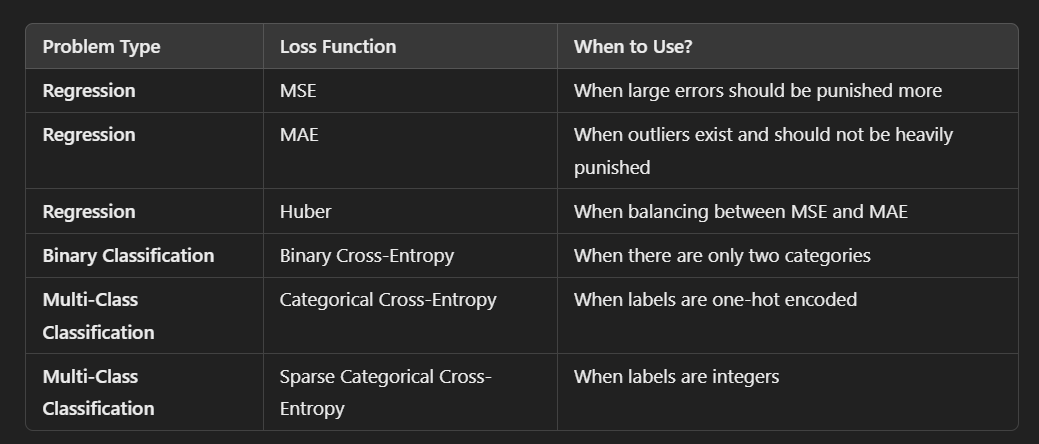

## Optimizers

An optimizer adjusts the weights of a neural network to minimize the loss function. It updates the model’s parameters using gradient descent.

The optimizer is used when compiling and training a neural network. It updates the model's weights to minimize the loss function.

**Why Do We Need Optimization Algorithms?**
- They update the weights of the model in the right direction.
- They speed up learning and help the model converge faster.
- They prevent the model from getting stuck in bad solutions.

Common Optimizers
- Gradient Descent – Updates weights by subtracting the gradient of the loss function.
- Stochastic Gradient Descent (SGD) – Uses random samples instead of full dataset.
- Adam (Adaptive Moment Estimation) – Adjusts learning rate automatically (most commonly used).
- RMSprop – Designed for recurrent neural networks.

### Gradient Descent (GD)
Gradient Descent is the most basic optimization algorithm. It works by computing the derivative (gradient) of the loss function and updating the weights accordingly.

**How It Works?**
1. Calculate the gradient (derivative) of the loss function with respect to each weight.
2. Update each weight by moving in the direction of the negative gradient.
3. Repeat until the loss stops decreasing (converges).

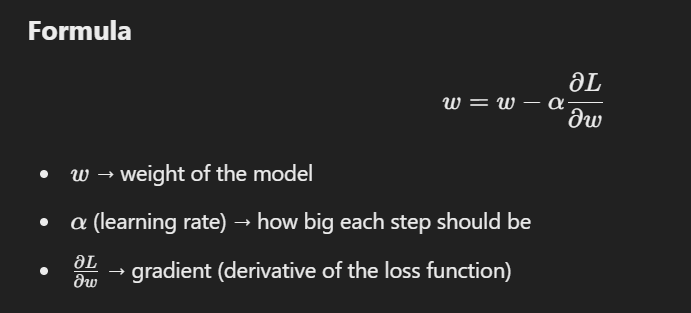

**Pros & Cons**
- ✅ Works well for small datasets.
- ❌ Very slow for large datasets (computes gradient using the entire dataset).

**Where to Use?**
- When the dataset is small and can fit in memory.
- When computational resources are not a limitation.

### Stochastic Gradient Descent (SGD)
SGD is a faster version of Gradient Descent that updates weights using only one random sample at a time, instead of the entire dataset.

**How It Works?**
1. Pick one random training example.
2. Compute the gradient.
3. Update the weights.
4. Repeat for the next random training example.
    
**Pros & Cons**
- ✅ Much faster than Gradient Descent.
- ✅ Can handle large datasets.
- ❌ More noisy (weights keep changing in unpredictable ways).
- ❌ May not converge smoothly.

**Where to Use?**
- When dealing with very large datasets (e.g., millions of records).
- When you want a faster but slightly unstable optimization.


### Momentum (Improvement of SGD)
Momentum helps SGD move faster and smoother by adding a "memory" of the previous weight updates. This prevents oscillations and speeds up convergence.

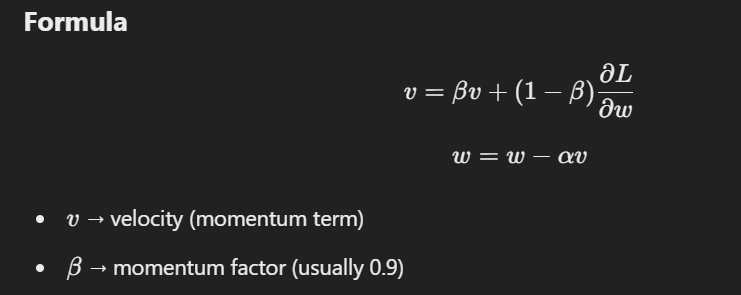

**Pros & Cons**
- ✅ Reduces noisy updates in SGD.
- ✅ Converges faster than plain SGD.
- ❌ Still needs tuning of the learning rate.

**Where to Use?**
- When SGD is too slow and unstable.
- When training deep neural networks (e.g., image classification).

### RMSprop (Root Mean Square Propagation)
RMSprop improves SGD by adapting the learning rate for each parameter separately. It scales the learning rate based on past gradients, making learning stable.

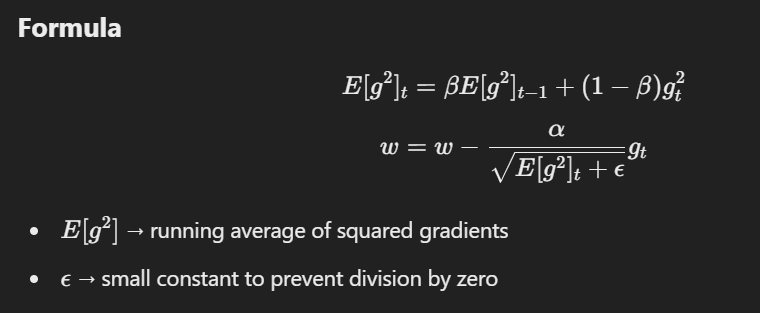

**Pros & Cons**
- ✅ Works well when data has different scales.
- ✅ Helps avoid oscillations and speeds up training.
- ❌ Requires tuning the decay rate parameter.

**Where to Use?**
- When dealing with problems where the scale of features varies a lot (e.g., RNNs for time-series data).
- When standard SGD is too unstable.

### Adam (Adaptive Moment Estimation)
Adam is one of the most popular optimization algorithms. It combines Momentum and RMSprop, making learning both fast and stable.

**How It Works?**
- Uses momentum to speed up learning.
- Uses RMSprop to adapt the learning rate for each parameter.

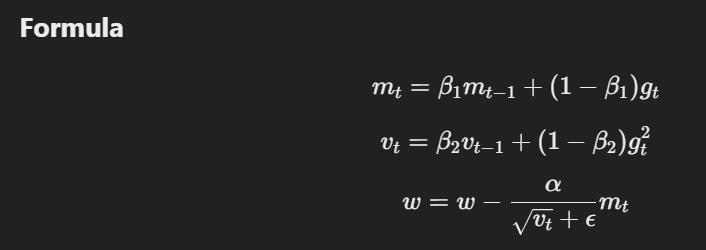

**Pros & Cons**
- ✅ Works well for most deep learning tasks.
- ✅ Requires very little parameter tuning.
- ✅ Combines the best of Momentum and RMSprop.
- ❌ Can sometimes overshoot the optimal solution.

**Where to Use?**
- Deep learning tasks (CNNs, RNNs, Transformers, etc.)
- When you want a fast, reliable optimizer with little tuning needed

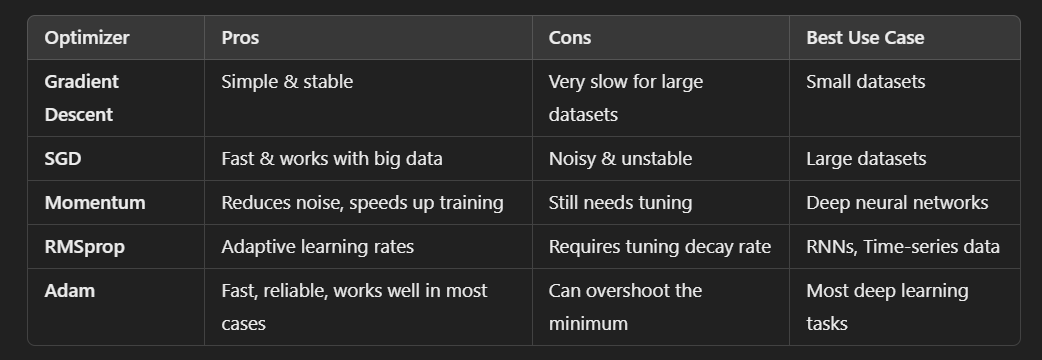

**Which Optimizer Should You Use?**
- For small datasets → Use Gradient Descent.
- For large datasets → Use SGD.
- For deep learning (CNNs, RNNs, Transformers, etc.) → Use Adam.
- For time-series data (RNNs, LSTMs, etc.) → Use RMSprop.
- If SGD is too noisy → Use Momentum.

**`Adam` is the most commonly used optimizer because it balances speed and accuracy. However, for specific problems (like time-series), other optimizers like `RMSprop` might work better.**

In [ ]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)         # Stochastic Gradient Descent
optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.001)    # RMSprop
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)       # Adam

In [22]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

# Generate some dummy data
X_train = np.random.rand(1000, 10)  # 1000 samples, 10 features
y_train = np.random.randint(0, 2, size=(1000,))  # Binary classification (0 or 1)

# Define a simple model
model = keras.Sequential([
    keras.layers.Dense(32, activation='relu', input_shape=(10,)),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')  # Output layer (binary classification)
])

# **Where Optimizer is Used**
# Compile the model and specify the optimizer
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),  # Using Adam optimizer
              loss='binary_crossentropy',  # Suitable for binary classification
              metrics=['accuracy'])

# Train the model (Optimizer is applied automatically in this step)
model.fit(X_train, y_train, epochs=10, batch_size=32)

e:\notebook\notebook_env\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - accuracy: 0.5328 - loss: 0.7163
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5196 - loss: 0.6937
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5295 - loss: 0.6911
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5249 - loss: 0.6936
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5330 - loss: 0.6924
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5419 - loss: 0.6898
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5307 - loss: 0.6912
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5631 - loss: 0.6845
Epoch 9/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5502 - loss: 0.6857
Epoch 10/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5476 - loss: 0.6867


## Backpropagation & Updating Weights

What is Backpropagation?
Backpropagation is the process of calculating gradients and updating weights in a neural network from output to input layers.

Steps of Backpropagation

1. Forward Pass (Prediction)
    - The input data is passed through the network.
    - The activations are computed layer by layer.
    - The final output is produced.

2. Compute Loss (Error Calculation)
    - The loss function measures how far the predicted output is from the actual value.

3. Backward Pass (Gradient Calculation)
    - The gradient of the loss is computed with respect to each weight using the chain rule (derivatives).
    - The gradients show how the loss changes with small changes in weights.

4. Weight Update (Gradient Descent)
    - The optimizer updates the weights using the computed gradients.

In [23]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

# Generate dummy data
X_train = np.random.rand(1000, 10)  # 1000 samples, 10 features
y_train = np.random.randint(0, 2, size=(1000,))  # Binary labels (0 or 1)

# Define a simple neural network
model = keras.Sequential([
    keras.layers.Dense(32, activation='relu', input_shape=(10,)),  # Hidden Layer 1
    keras.layers.Dense(16, activation='relu'),  # Hidden Layer 2
    keras.layers.Dense(1, activation='sigmoid')  # Output Layer (Binary Classification)
])

# Compile the model (Backpropagation is handled here)
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

# Train the model (Backpropagation happens here)
model.fit(X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10


e:\notebook\notebook_env\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.4866 - loss: 0.6995
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5415 - loss: 0.6910
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5496 - loss: 0.6890
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5589 - loss: 0.6891
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5537 - loss: 0.6889
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5848 - loss: 0.6855
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5776 - loss: 0.6835
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5480 - loss: 0.6894
Epoch 9/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5735 - loss: 0.6825
Epoch 10/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5656 - loss: 0.6815


**Where is Backpropagation Used?**

In `model.fit()`, TensorFlow automatically:
1. Performs the Forward Pass.
2. Computes the Loss.
3. Uses Backpropagation to calculate gradients.
4. Updates the weights using the optimizer.

<br>

- Backpropagation is used to compute gradients of the loss function w.r.t. the weights.
- Gradients tell the optimizer how to update the weights.
- Optimizers like SGD, Adam, and RMSprop apply updates to minimize the loss.
- In TensorFlow, backpropagation happens inside model.fit().

# Building and Training Neural Networks using TensorFlow & Keras

## Introduction to Keras API (Sequential vs. Functional API)
Before we build a neural network, we need to understand how to define models in Keras, which is a high-level API built on top of TensorFlow.

There are two ways to define a model in Keras:

1. Sequential API – Best for simple, linear stack of layers.
2. Functional API – Best for complex architectures like multi-input, multi-output networks.

###   Sequential API (Simplest Way to Build a Neural Network)

The Sequential API is used when you want to stack layers one after another. Each layer gets input from the previous layer and passes the output to the next.

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Create a Sequential Model
model = Sequential([  # Creating a sequential model
    Dense(16, activation='relu', input_shape=(8,)),  # First hidden layer (16 neurons, ReLU, 8 input features)
    Dense(8, activation='relu'),  # Second hidden layer (8 neurons, ReLU)
    # No input_shape needed above because TensorFlow automatically knows the shape from the previous layer.
    
    Dense(1, activation='sigmoid')  # Output layer (1 neuron, Sigmoid for binary classification)
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()

- `Sequential()` is a class in Keras (which is a high-level API in TensorFlow) used to create a linear stack of layers in a neural network. It means that each layer is added one after another, from input to output.

<br>

- `Dense()` is a fully connected (FC) layer, also called a fully connected neuron layer or dense layer. In this layer, each neuron is connected to every neuron in the next layer.
    - `Dense(units, activation, input_shape)`
        - units: Number of neurons in this layer.
        - activation: Activation function (like 'relu', 'sigmoid', etc.).
        - input_shape: The shape of input data (`only required for the first layer`).
    - It learns features from the data by adjusting weights during training.
    - The activation function helps the model learn complex patterns.

<br>

- `input_shape` defines the shape of the input data.
    - (8,) means the input has 8 features (columns).
    - It is required only in the first layer because TensorFlow needs to know what shape of data to expect.
    - It tells TensorFlow how many input features the model will receive.
    - Without this, TensorFlow wouldn’t know what size the input data is.


In [ ]:
# another to define model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(784,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

**No. of neurons in output layer**
1. For classification tasks:
    - Binary classification: 1 neuron (with sigmoid activation function)
    - Multi-class classification: Number of neurons equals the number of classes (with softmax activation function)

2. For regression tasks:
    - Single value prediction: 1 neuron (typically with linear/no activation)
    - Multi-output regression: Number of neurons equals the number of values you want to predict

**Shape of Input layer**

In [ ]:
# For a dataset with 10 features per sample
inputs = Input(shape=(10,)) # excluding target column

# Channels last (TensorFlow default): (height, width, channels)
inputs = Input(shape=(224, 224, 3))  # RGB image of 224x224 pixels, 3 for RGB images OR 1 for grayscale images 

# For sequences of 100 timesteps, each with 32 features
inputs = Input(shape=(100, 32))

# For text with sequences of 50 words, each represented by a one-hot vector of size 10000
inputs = Input(shape=(50, 10000))

# For text using word embeddings (after embedding layer)
inputs = Input(shape=(50,))  # Just sequence length for integer-encoded words

# Raw audio: (timesteps, channels)
inputs = Input(shape=(16000, 1))  # 1 second of 16kHz mono audio

# Spectrogram: (time_frames, frequency_bins, channels)
inputs = Input(shape=(128, 128, 1))  # Grayscale spectrogram

In [ ]:
## Graph Data

# Node features
node_inputs = Input(shape=(num_node_features,))

# Adjacency matrix or edge information
edge_inputs = Input(shape=(num_nodes, num_nodes))


# Variable-Length Sequences

# Using None for the variable dimension
inputs = Input(shape=(None, features_dim))  # Variable sequence length

# Padding to a fixed max length
max_length = 100
inputs = Input(shape=(max_length, features_dim))  # Zero-padded sequences
    

# Multiple Inputs**
<code>

# Image and metadata inputs
image_input = Input(shape=(224, 224, 3), name='image_input')
metadata_input = Input(shape=(15,), name='metadata_input')

# Then create the model with multiple inputs
model = Model(inputs=[image_input, metadata_input], outputs=output)
    

**Tips:** Check your data dimensions before designing your input layer: `X_train[0].shape`

#### Creating a Simple Neural Network (Dense Layers)

Let’s train a simple binary classification model using Sequential API on a dataset.

Dataset: Pima Indians Diabetes Dataset
- 8 input features (Pregnancies, Glucose, Blood Pressure, etc.)
- 1 output (0 = No Diabetes, 1 = Diabetes)

##### Step 1: Load the Dataset

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.utils import to_categorical

# Load dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
data = pd.read_csv(url, names=columns)

# Split data into input (X) and output (y)
X = data.iloc[:, :-1].values  # First 8 columns as input
y = data.iloc[:, -1].values   # Last column as output

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data (important for neural networks)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


##### Step 2: Define & Compile the Model

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define the model
model = Sequential([
    Dense(16, activation='relu', input_shape=(8,)),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


e:\notebook\notebook_env\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


##### Step 3: Train the Model

In [5]:
# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test))


Epoch 1/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.3633 - loss: 0.8271 - val_accuracy: 0.5455 - val_loss: 0.6855
Epoch 2/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5112 - loss: 0.7046 - val_accuracy: 0.6688 - val_loss: 0.6246
Epoch 3/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6549 - loss: 0.6473 - val_accuracy: 0.7468 - val_loss: 0.5799
Epoch 4/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7096 - loss: 0.6030 - val_accuracy: 0.7597 - val_loss: 0.5434
Epoch 5/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7439 - loss: 0.5521 - val_accuracy: 0.7987 - val_loss: 0.5105
Epoch 6/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7921 - loss: 0.5037 - val_accuracy: 0.7987 - val_loss: 0.4889
Epoch 7/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7533 - loss: 0.5240 - val_accuracy: 0.8052 - val_loss: 0.4772
Epoch 8/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7606 - loss: 0.4880 - val_accuracy: 0.8052 - val_loss

**Key Parameters Explained:**

- epochs=50 → Train the model for 50 iterations over the dataset.
- batch_size=16 → Updates weights every 16 samples.
- validation_data=(X_test, y_test) → Evaluates model performance on test data.

##### Step 4: Evaluate the Model

In [6]:
# Evaluate on test data
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7411 - loss: 0.5471 
Test Accuracy: 0.7597


##### Step 5: Make Predictions

In [7]:
# Make predictions
predictions = model.predict(X_test)
predictions = (predictions > 0.5)  # Convert probabilities to binary (0 or 1)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step 


### Functional API (For More Flexible Architectures)

The Functional API is a more flexible way to create models in Keras compared to the Sequential API. While Sequential models are limited to linear stacks of layers, the Functional API allows you to build complex model architectures with `multiple inputs`, `multiple outputs`, `shared layers`, and `non-linear topology`.

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

# Define input layer
inputs = Input(shape=(8,))

# Define hidden layers
x = Dense(16, activation='relu')(inputs) # Apply a dense layer to the input
x = Dense(8, activation='relu')(x)

# Define output layer
outputs = Dense(1, activation='sigmoid')(x)

# Create the model
model = Model(inputs=inputs, outputs=outputs)

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()

#### Multiple Inputs, Single Output

In [ ]:
from tensorflow.keras.layers import Input, Dense, Concatenate
from tensorflow.keras.models import Model

# Define inputs
image_input = Input(shape=(224, 224, 3))
metadata_input = Input(shape=(10,))

# Process image branch
x1 = Conv2D(32, (3, 3))(image_input)
x1 = Flatten()(x1)

# Process metadata branch
x2 = Dense(32)(metadata_input)

# Combine branches
combined = Concatenate()([x1, x2])
output = Dense(1, activation='sigmoid')(combined)

# Create model with multiple inputs
model = Model(inputs=[image_input, metadata_input], outputs=output)

Here's a complete example of a multi-input model that predicts movie ratings based on both user data and movie features:

In [ ]:
from tensorflow.keras.layers import Input, Dense, Embedding, Flatten, Concatenate
from tensorflow.keras.models import Model

# User input branch
user_input = Input(shape=(1,), name='user_input')
user_embedding = Embedding(num_users, 32)(user_input)
user_features = Flatten()(user_embedding)
user_features = Dense(16, activation='relu')(user_features)

# Movie input branch
movie_input = Input(shape=(1,), name='movie_input')
movie_embedding = Embedding(num_movies, 32)(movie_input)
movie_features = Flatten()(movie_embedding)
movie_features = Dense(16, activation='relu')(movie_features)

# Combine user and movie features
combined = Concatenate()([user_features, movie_features])
combined = Dense(8, activation='relu')(combined)

# Output layer
output = Dense(1)(combined)

# Create and compile the model
model = Model(inputs=[user_input, movie_input], outputs=output)
model.compile(optimizer='adam', loss='mse')

**📌 Scenario:** Predict house prices using two different types of input data:

- Numerical Features (e.g., area, number of rooms, etc.)
- Textual Features (e.g., house description processed as embeddings)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Concatenate

# Input 1: Numerical data (3 features)
input_numeric = Input(shape=(3,), name="numeric_input")

# Input 2: Text data (processed as embeddings, 5 features)
input_text = Input(shape=(5,), name="text_input")

# Process Numeric Input
x1 = Dense(16, activation='relu')(input_numeric)

# Process Text Input
x2 = Dense(16, activation='relu')(input_text)

# Merge both inputs
merged = Concatenate()([x1, x2])
hidden = Dense(8, activation='relu')(merged)

# Output layer (house price prediction - regression)
output = Dense(1, activation='linear', name="price_output")(hidden)

# Define model
model = Model(inputs=[input_numeric, input_text], outputs=output)

# Compile model
model.compile(optimizer='adam', loss='mse')

# Summary
model.summary()


**✅ Explanation:**

- Two inputs (`input_numeric`, `input_text`).
- Each input has its own processing (Dense layers).
- They are merged using `Concatenate()`.
- The final output is a single regression value (house price).

#### Multiple Inputs, Multiple Outputs

**📌 Scenario:** Predict house price (regression) and house category (classification) using two different inputs:

- Numerical Features (e.g., area, number of rooms, etc.)
- Location Features (e.g., latitude, longitude, zip code)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Concatenate

# Input 1: Numerical data (3 features)
input_numeric = Input(shape=(3,), name="numeric_input")

# Input 2: Location data (2 features)
input_location = Input(shape=(2,), name="location_input")

# Process Numeric Input
x1 = Dense(16, activation='relu')(input_numeric)

# Process Location Input
x2 = Dense(16, activation='relu')(input_location)

# Merge both inputs
merged = Concatenate()([x1, x2])
hidden = Dense(8, activation='relu')(merged)

# Output 1: Predict House Price (Regression)
price_output = Dense(1, activation='linear', name="price_output")(hidden)

# Output 2: Predict House Category (Classification: Low, Medium, High)
category_output = Dense(3, activation='softmax', name="category_output")(hidden)

# Define model
model = Model(inputs=[input_numeric, input_location], outputs=[price_output, category_output])

# Compile model
model.compile(optimizer='adam', 
              loss={'price_output': 'mse', 'category_output': 'sparse_categorical_crossentropy'},
              metrics={'price_output': 'mse', 'category_output': 'accuracy'})

# Summary
model.summary()

**✅ Explanation:**

- Two inputs: `input_numeric` and `input_location`.
- Two outputs:
- `price_output` (regression).
- `category_output` (classification with softmax).
- Different loss functions for each output.

#### How to Train a Multi-Input, Multi-Output Model?

In [ ]:
# Sample input data
X_numeric = [[1200, 3, 2], [800, 2, 1]]   # Example house features
X_location = [[40.7, -74.0], [34.0, -118.2]]  # Example location features

# Output labels
y_price = [500000, 300000]  # House prices (Regression)
y_category = [2, 1]  # House categories (Label Encoded: 0=Low, 1=Medium, 2=High)

# Train the model
model.fit([X_numeric, X_location], [y_price, y_category], epochs=10)

#### Layer Sharing

**📌 Scenario:**

- You have multiple inputs (e.g., two images of different sizes)
- You want to process them with the same layers (shared layers)
- Then, combine their outputs for further processing

**🛠️ Example 1: Shared Layers for Two Inputs (Feature Extraction)**

🔹 `Use Case:`
Imagine a Siamese Network that compares two images to determine similarity. Both images should pass through the same CNN layers for feature extraction.

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Conv2D, Flatten, MaxPooling2D

# Define a shared feature extractor (Convolutional Network)
def shared_feature_extractor(input_shape):
    inputs = Input(shape=input_shape)
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Flatten()(x)
    x = Dense(128, activation='relu')(x)
    return Model(inputs, x)  # Return as a Model

# Define shared layers (same CNN applied to both inputs)
shared_model = shared_feature_extractor((64, 64, 3))

# Input 1: First image
input1 = Input(shape=(64, 64, 3))
processed1 = shared_model(input1)

# Input 2: Second image
input2 = Input(shape=(64, 64, 3))
processed2 = shared_model(input2)  # Uses the SAME CNN

# Merge both processed features
merged = tf.keras.layers.Concatenate()([processed1, processed2])
output = Dense(1, activation='sigmoid')(merged)  # Binary classification (similar/not similar)

# Define model
model = Model(inputs=[input1, input2], outputs=output)

# Compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Summary
model.summary()


**🛠️ Example 2: Shared Embedding Layer for Different Text Inputs**

🔹 `Use Case:`
A question-answering system where the question and answer are processed using the same embedding layer.

In [ ]:
from tensorflow.keras.layers import Input, Embedding, LSTM

# Shared Embedding Layer
shared_embedding = Embedding(input_dim=10000, output_dim=128, input_length=50)

# Input 1: Question
input_question = Input(shape=(50,))
embedded_question = shared_embedding(input_question)

# Input 2: Answer
input_answer = Input(shape=(50,))
embedded_answer = shared_embedding(input_answer)  # Uses the SAME embedding

# Process both sequences using LSTM
lstm_layer = LSTM(64)
question_encoded = lstm_layer(embedded_question)
answer_encoded = lstm_layer(embedded_answer)

# Merge features
merged = tf.keras.layers.Concatenate()([question_encoded, answer_encoded])
output = Dense(1, activation='sigmoid')(merged)  # Binary classification (relevant/not relevant)

# Define model
model = Model(inputs=[input_question, input_answer], outputs=output)

# Compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Summary
model.summary()


You can use the same layer instance multiple times:

In [ ]:
# Create a shared layer
shared_layer = Dense(64, activation='relu')

# Use it on different inputs
input_a = Input(shape=(32,))
input_b = Input(shape=(32,))

output_a = shared_layer(input_a)
output_b = shared_layer(input_b)

# Both outputs will use the same weights

#### No-linear topology
Unlike a simple sequential model, non-linear topology allows multiple branches, merges, or parallel paths in a deep learning model. It is useful for multi-input, multi-output, or complex data processing.

**🛠️ Example 1: Multi-Path Model (Two Parallel Feature Extractors)**

🔹`Use Case:`

    - Suppose you have two different types of inputs (e.g., text and image).
    - Each input has its own processing branch before merging.

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Conv2D, Flatten, LSTM, Embedding

# Image Input Branch
image_input = Input(shape=(64, 64, 3))  # Image input
x = Conv2D(32, (3, 3), activation='relu', padding='same')(image_input)
x = Flatten()(x)
x = Dense(64, activation='relu')(x)

# Text Input Branch
text_input = Input(shape=(100,))  # Text input (100-word sequence)
y = Embedding(input_dim=5000, output_dim=128, input_length=100)(text_input)
y = LSTM(64)(y)

# Merge both branches
merged = tf.keras.layers.Concatenate()([x, y])
output = Dense(1, activation='sigmoid')(merged)  # Binary classification

# Define model
model = Model(inputs=[image_input, text_input], outputs=output)

# Compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Summary
model.summary()


This model processes images and text separately, then merges the extracted features.

<br>

**🛠️ Example 2: Residual Connections (Skip Connections)**

🔹 `Use Case:`

    - Used in ResNet-like architectures.
    - Helps solve vanishing gradient problems in deep networks.

In [ ]:
from tensorflow.keras.layers import Add

# Input layer
inputs = Input(shape=(32,))

# First Dense layer
x = Dense(64, activation='relu')(inputs)

# Skip Connection: Add input directly to next layer
x1 = Dense(64, activation='relu')(x)
x1 = Add()([x, x1])  # Skip connection (residual link)

# Output layer
output = Dense(1, activation='sigmoid')(x1)

# Define model
model = Model(inputs=inputs, outputs=output)

# Compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Summary
model.summary()


✅ This model adds a shortcut connection to help gradients flow through the network.

<br>

**🛠️ Example 3: Multi-Output Model (Different Outputs for Different Tasks)**

🔹 `Use Case:`
The model predicts two different things (e.g., age & gender from an image).

In [ ]:
# Input Layer
input_img = Input(shape=(128, 128, 3))

# Shared Feature Extractor
x = Conv2D(32, (3, 3), activation='relu')(input_img)
x = Flatten()(x)

# Output 1: Predict Age (Regression)
age_output = Dense(1, activation='linear', name='age_output')(x)

# Output 2: Predict Gender (Binary Classification)
gender_output = Dense(1, activation='sigmoid', name='gender_output')(x)

# Define Model
model = Model(inputs=input_img, outputs=[age_output, gender_output])

# Compile Model with multiple losses
model.compile(optimizer='adam', 
              loss={'age_output': 'mse', 'gender_output': 'binary_crossentropy'},
              metrics={'age_output': 'mae', 'gender_output': 'accuracy'})

# Summary
model.summary()


✅ This model predicts both age (regression) and gender (classification) from an image.

You can implement skip connections, branching paths, and other complex architectures:

In [ ]:
# Create a residual connection
inputs = Input(shape=(32,))
x = Dense(32)(inputs)
x = Dense(32)(x)
# Add the residual connection
outputs = Add()([inputs, x])

model = Model(inputs=inputs, outputs=outputs)

#### Model Composition: Using Entire Models as Layers
In TensorFlow/Keras, you can treat entire models as layers inside a bigger model. This is useful for modular design, transfer learning, or ensemble models.

**🚀 Example 1: Stacking Models**

🔹 `Use Case:`

- Suppose you have two pre-trained models for feature extraction.
- You stack them together in a larger model.

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

# Define First Model
input1 = Input(shape=(32,))
x = Dense(64, activation='relu')(input1)
x = Dense(32, activation='relu')(x)
model1 = Model(inputs=input1, outputs=x, name="FeatureExtractor1")

# Define Second Model
input2 = Input(shape=(32,))
y = Dense(64, activation='relu')(input2)
y = Dense(32, activation='relu')(y)
model2 = Model(inputs=input2, outputs=y, name="FeatureExtractor2")

# Combine Outputs from Both Models
merged = tf.keras.layers.Concatenate()([model1.output, model2.output])
final_output = Dense(1, activation='sigmoid')(merged)

# Define the Final Model
final_model = Model(inputs=[model1.input, model2.input], outputs=final_output)

# Compile Model
final_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Summary
final_model.summary()


✅ This model takes two inputs, extracts features separately, and merges them before making a prediction.

<br>

**🚀 Example 2: Using a Pretrained Model as a Layer**

🔹 `Use Case:`
You want to use MobileNetV2 as a feature extractor and stack a custom classifier on top.

In [ ]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import GlobalAveragePooling2D

# Load Pretrained Model (Without Top Layer)
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze Pretrained Layers
base_model.trainable = False

# Custom Classifier
x = GlobalAveragePooling2D()(base_model.output)
x = Dense(128, activation='relu')(x)
output = Dense(1, activation='sigmoid')(x)

# Define New Model
model = Model(inputs=base_model.input, outputs=output)

# Compile Model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Summary
model.summary()


✅ This uses MobileNetV2 as a frozen feature extractor and adds a custom classifier on top.

<br>

**🚀 Example 3: Recursive Model Composition**

🔹 `Use Case:`
You want to reuse the same model multiple times inside another model.

In [ ]:
# Define a Small Model as a Function
def small_model():
    inputs = Input(shape=(16,))
    x = Dense(32, activation='relu')(inputs)
    outputs = Dense(16, activation='relu')(x)
    return Model(inputs, outputs)

# Create Instances of the Small Model
sub_model = small_model()

# Use It Multiple Times in a Bigger Model
input_layer = Input(shape=(16,))
x1 = sub_model(input_layer)  # First instance
x2 = sub_model(x1)  # Second instance (recursive)
final_output = Dense(1, activation='sigmoid')(x2)

# Define the Final Model
final_model = Model(inputs=input_layer, outputs=final_output)

# Compile and Summarize
final_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
final_model.summary()
